# CS294-082 MEC and Progression Curve
Referred to [Gerald's Chapter 9](https://piazza.com/redirect/s3?bucket=uploads&prefix=paste%2Fjeqdgp7ec8fv4%2Fbb8d09923f28f8df1326688d66f267909167aa329fce3b0f33616c54e562338e%2FInformation_View_on_Data_Science.pdf) for dataset MEC and progression curve algorithms.

Github repo: https://github.com/XinyiJi1/csc412_project.git

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(12,8)})

## Utils for calculating the dataset MEC

In [19]:
# input: dataframe contains labels and thresholds, sorted by descending thresholds
# output: a dictionary with key as labels, value as sums of feature values
# def: iterate through the labels, increment corresponding label's threshold by 1 whenever the label changes
def generate_MEC_dict(df):
    current_class = -1
    # generate an empty dictionary from df, with default value as 0
    mec_dict = dict.fromkeys(df['label'], 0)
    # increment dict value by 1 whenever the class changes
    for index, row in df.iterrows():
        if(row['label'] != current_class):
            mec_dict[row['label']] += 1
            current_class = row['label']
    return mec_dict

# input: dataframe with labels, thresholds, and label occurrences
# output: print out the dataset MEC
# using the formula to calculate MEC: sum(1/pi * log_2(threshold+1)), for all i classes
def calculate_MEC(df, feature_cols):
    mec = 0
    total = df['counts'].sum()
    # print(total)
    for index, row in df.iterrows():
        percentage = row['counts'] / total
        # print(percentage)
        # DEPRECATED FUNCTION
        # mec += (1 / percentage) * np.log2(row['threshold'] + 1)
        # NEW FUNCTION FOR MEC  
        mec +=  percentage * np.log2(row['threshold'] + 1) * feature_cols
        # print(mec)
    print('The total MEC of the dataset is: ', mec, 'bits')
    return mec

# input: dataframe with all the features, labels (labels in the last column)
# output: print out the dataset MEC
# dataframe manipulation, and calculate the MEC of the dataset
def calc_dataset_MEC(df, feature_cols):
    # extract the preceding feature columns
    cols = df.columns[:feature_cols]
    # added a new column of the sum of features for each instance
    df['sums'] = df[cols].sum(axis=1)
    # count the occurrence for each lable
    df['counts'] = df.groupby(['label'])['label'].transform('count')
    count_df = df[['label', 'counts']]
    count_df = count_df.drop_duplicates(subset=['label']).reset_index(drop=True)
    # generate the mec df with descending feature sums 
    # last three columns label, sum, count
    # sort by descending feature value sums
    mec_df = df.sort_values('sums', ascending=False).iloc[:, -3:].reset_index(drop=True)
    # produce the threshold dict for calculating MEC
    mec_dict = generate_MEC_dict(mec_df)
    # convert the dict into dataframe
    threshold_df = pd.DataFrame(mec_dict.items(), columns=['label', 'threshold'])
    threshold_df = threshold_df.merge(count_df, on='label').sort_values(by=['counts'], ascending=False).reset_index(drop=True)
    # print('sum', threshold_df['threshold'].sum())
    # print(threshold_df)
    return calculate_MEC(threshold_df, feature_cols)

## MEC of the transformer training set

In [28]:
transformer_df = pd.read_csv('data_mlp.csv')
training_transformer_df = transformer_df.loc[:2699, :].copy(deep=True)
calc_dataset_MEC(training_transformer_df, 512);

The total MEC of the dataset is:  3521.960090636637 bits


## MEC of the training set

In [29]:
training_df = pd.read_csv("traning_data_mec.csv")
calc_dataset_MEC(training_df, 256);

The total MEC of the dataset is:  1759.516263658391 bits


## Capacity Progression Curve

In [32]:
# input: dataframe with features and label (same as mec df)
# output: dataframe containing mec values for different % of training data
# algorithm 2: sample training data from 5 to 100 percent (step 5) and generate the df 
def progression_curve(df, feature_cols):
    pcurve_df = pd.DataFrame(columns = ['size', 'mec'])
    sizes = [i for i in np.arange(5,101,5)]
#     sizes = [5,10,20,40,80,100]
    # sample the dataset and calculate its MEC
    for size in sizes:
        current_df = df.sample(frac=size/100)
        current_mec = calc_dataset_MEC(current_df, feature_cols)
        pcurve_df = pcurve_df.append({'size' : size, 'mec' : current_mec},
               ignore_index = True)
    return pcurve_df
# pcurve_df = progression_curve(balanced_df)
# pcurve_df = progression_curve(data_with_label_df)
pcurve_df = progression_curve(training_df, 256)
pcurve_df

The total MEC of the dataset is:  756.0413613290593 bits
The total MEC of the dataset is:  941.3466760273711 bits
The total MEC of the dataset is:  1096.3761465393957 bits
The total MEC of the dataset is:  1182.1380852630425 bits
The total MEC of the dataset is:  1259.638487756374 bits
The total MEC of the dataset is:  1320.9207686769241 bits
The total MEC of the dataset is:  1385.290272818098 bits
The total MEC of the dataset is:  1435.0598909666066 bits
The total MEC of the dataset is:  1470.2921932266954 bits
The total MEC of the dataset is:  1507.098080592632 bits
The total MEC of the dataset is:  1545.7053935937104 bits
The total MEC of the dataset is:  1578.1297217103124 bits
The total MEC of the dataset is:  1598.6898279296547 bits
The total MEC of the dataset is:  1627.524930614482 bits
The total MEC of the dataset is:  1655.092364908368 bits
The total MEC of the dataset is:  1681.533533052575 bits
The total MEC of the dataset is:  1699.345704289819 bits
The total MEC of the da

,size,mec
0,5.0,756.041361
1,10.0,941.346676
2,15.0,1096.376147
3,20.0,1182.138085
4,25.0,1259.638488
5,30.0,1320.920769
6,35.0,1385.290273
7,40.0,1435.059891
8,45.0,1470.292193
9,50.0,1507.098081


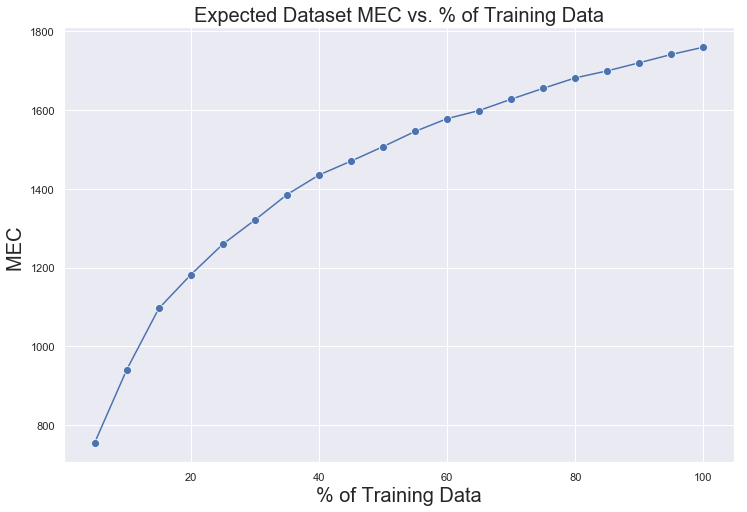

In [33]:
p = sns.lineplot(x='size', y='mec', data=pcurve_df, marker='o', markersize=8)
p.set_xlabel("% of Training Data", fontsize = 20)
p.set_ylabel("MEC ", fontsize = 20)
p.set_title("Expected Dataset MEC vs. % of Training Data", size = 20);